# CV Lab 5: Image Registration

Name: Pranay Gupta

PRN: 1032211057

Batch: A4

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Text(0.5, 1.0, 'Target')

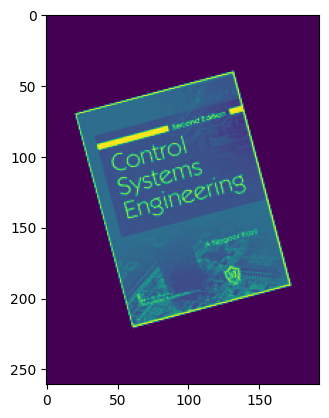

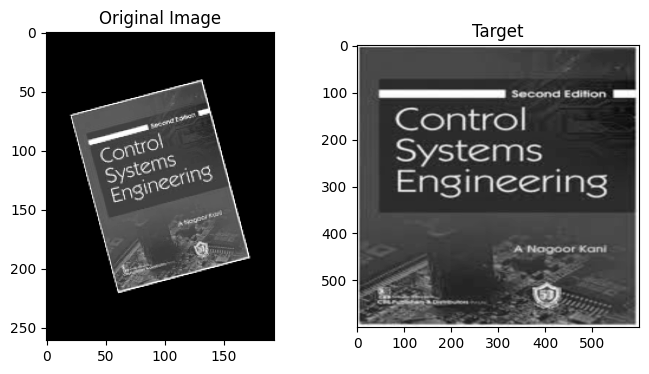

In [6]:
img1 = cv2.imread('/content/drive/MyDrive/cs.jpeg',0)
#img1 = cv2.resize(img1, (500,750))
rows,cols= img1.shape
img_rotated = cv2.warpAffine(img1, cv2.getRotationMatrix2D((cols/2, rows/2), 15, 0.6),(cols, rows))
plt.imshow(img_rotated)

img2 = cv2.imread('/content/drive/MyDrive/cs.jpeg',0)
img2 = cv2.resize(img2, (600,600))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("Target")

Descriptors:
 [[17.  0.  0. ...  8. 34.  0.]
 [ 1.  2. 21. ... 11.  0.  0.]
 [ 1. 11. 30. ...  3.  1.  2.]
 ...
 [12.  1.  0. ... 46. 22.  1.]
 [ 9. 53. 21. ...  1.  0.  1.]
 [58.  0.  0. ... 27. 10.  0.]]


Text(0.5, 1.0, 'Keypoints')

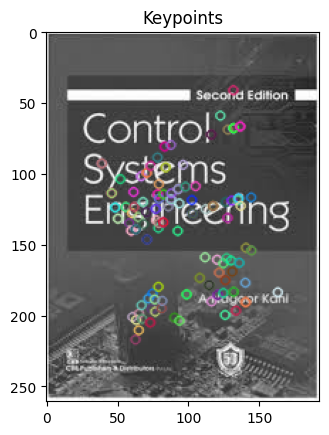

In [7]:
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img_rotated,None)
img_1 = img_rotated.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

In [9]:

#ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_rotated, None)
kp2, des2 = orb.detectAndCompute(img2, None)

len(kp1), len(kp2)

(397, 500)

Text(0.5, 1.0, 'Feature Matching using ORB')

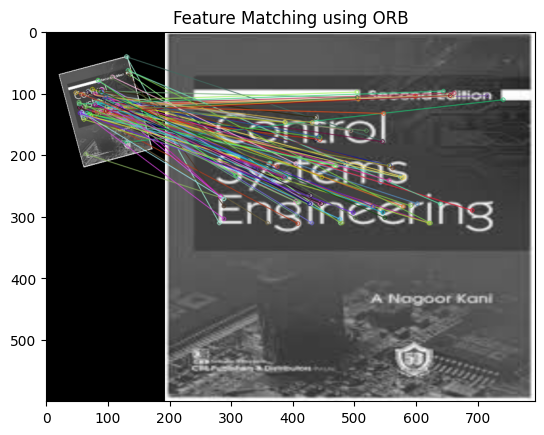

In [10]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

#Picking the top 1500 matches
img3 = cv2.drawMatches(img_rotated, kp1, img2, kp2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using ORB")

In [11]:

#Finding homography transform
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 25.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-5.08903427e-01 -1.24459190e+00  2.50959736e+02]
 [-2.78949181e-01 -1.02913890e+00  1.74720176e+02]
 [-3.05368861e-03 -4.29889518e-03  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

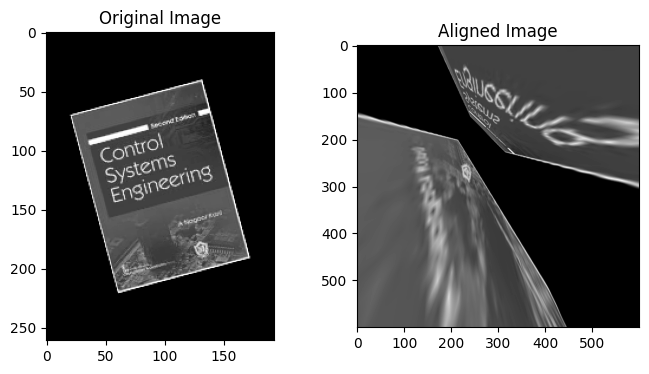

In [12]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img_rotated, M, (img2.shape[1], img2.shape[0]))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")

In [13]:

#SIFT (Scale Invarient Feature Transform)
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)


(329, 1291)

Text(0.5, 1.0, 'Feature Matching using SIFT')

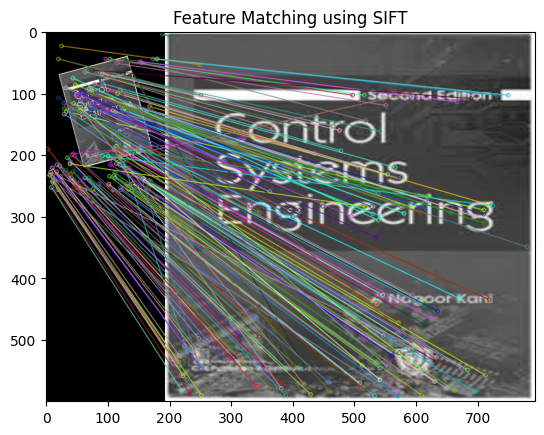

In [15]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img_rotated, keypoints_1, img2, keypoints_2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using SIFT")

In [16]:


#Finding homography transform
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[ 3.12774457e+00  5.78169882e-03 -1.17725497e+00]
 [ 1.04450350e-02  2.30937588e+00 -7.70142329e-01]
 [ 1.99006704e-05  1.12876632e-05  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

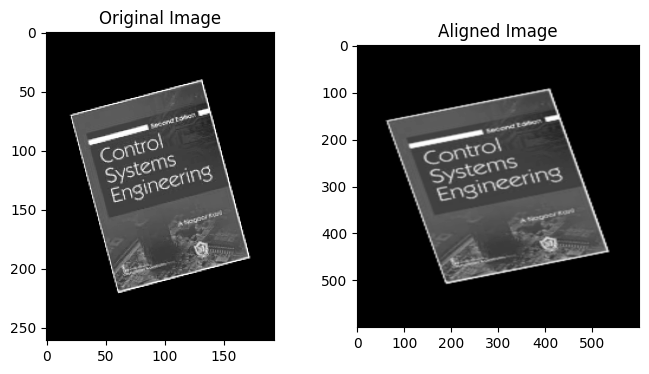

In [17]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img_rotated, M, (img2.shape[1], img2.shape[0]))
figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_rotated, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")